<h1><center>SPARK4AI TASK</center></h1>

The model below predicts the flight prices based on factors like airlines, initial and final destination, time of departure and arrival, etc., providing an approximate idea of flight fares.

In [1]:
#importing basic libraries for handling the data 

import numpy as np
import pandas as pd
import seaborn as s
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:\\Users\\shrey\\Desktop\\Study\\Computer\\ML\\Flight price prediction\\Airplane.csv')
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Indigo,6E-5001,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955
4,Indigo,6E-6202,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.17,1,5955


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41528 entries, 0 to 41527
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           41528 non-null  object 
 1   flight            41528 non-null  object 
 2   source_city       41528 non-null  object 
 3   departure_time    41528 non-null  object 
 4   stops             41528 non-null  object 
 5   arrival_time      41528 non-null  object 
 6   destination_city  41528 non-null  object 
 7   class             41528 non-null  object 
 8   duration          41528 non-null  float64
 9   days_left         41528 non-null  int64  
 10  price             41528 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 3.5+ MB


In [4]:
data['price'].describe()

count    41528.000000
mean     14903.892001
std      17499.797248
min       2074.000000
25%       3957.000000
50%       6082.000000
75%      16210.000000
max      79954.000000
Name: price, dtype: float64

In [5]:
#checking the null values and removing it luckily no null values
display(data.isnull().sum())

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
value=data.groupby(['flight','airline'],as_index=False).count()
value.airline.value_counts()

airline
Indigo       283
Air_India    149
SpiceJet      87
AirAsia       82
Name: count, dtype: int64

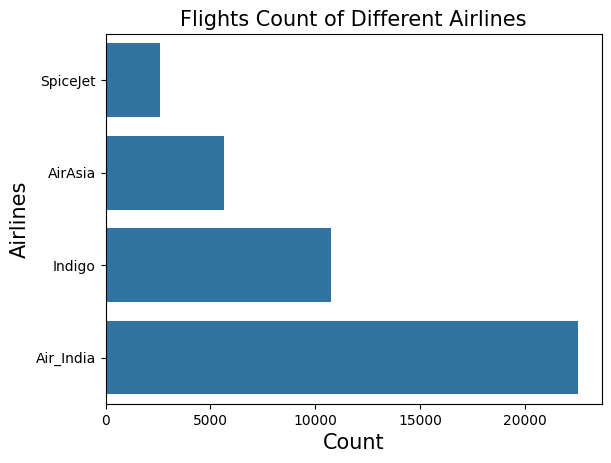

In [7]:
#Graph between airlines and count of the airlines
plt.figure()
s.countplot(data['airline'])
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Airlines',fontsize=15)
plt.show()

In [8]:
classes = data['class'].value_counts()
print(classes)

class
Economy     31797
Business     9731
Name: count, dtype: int64


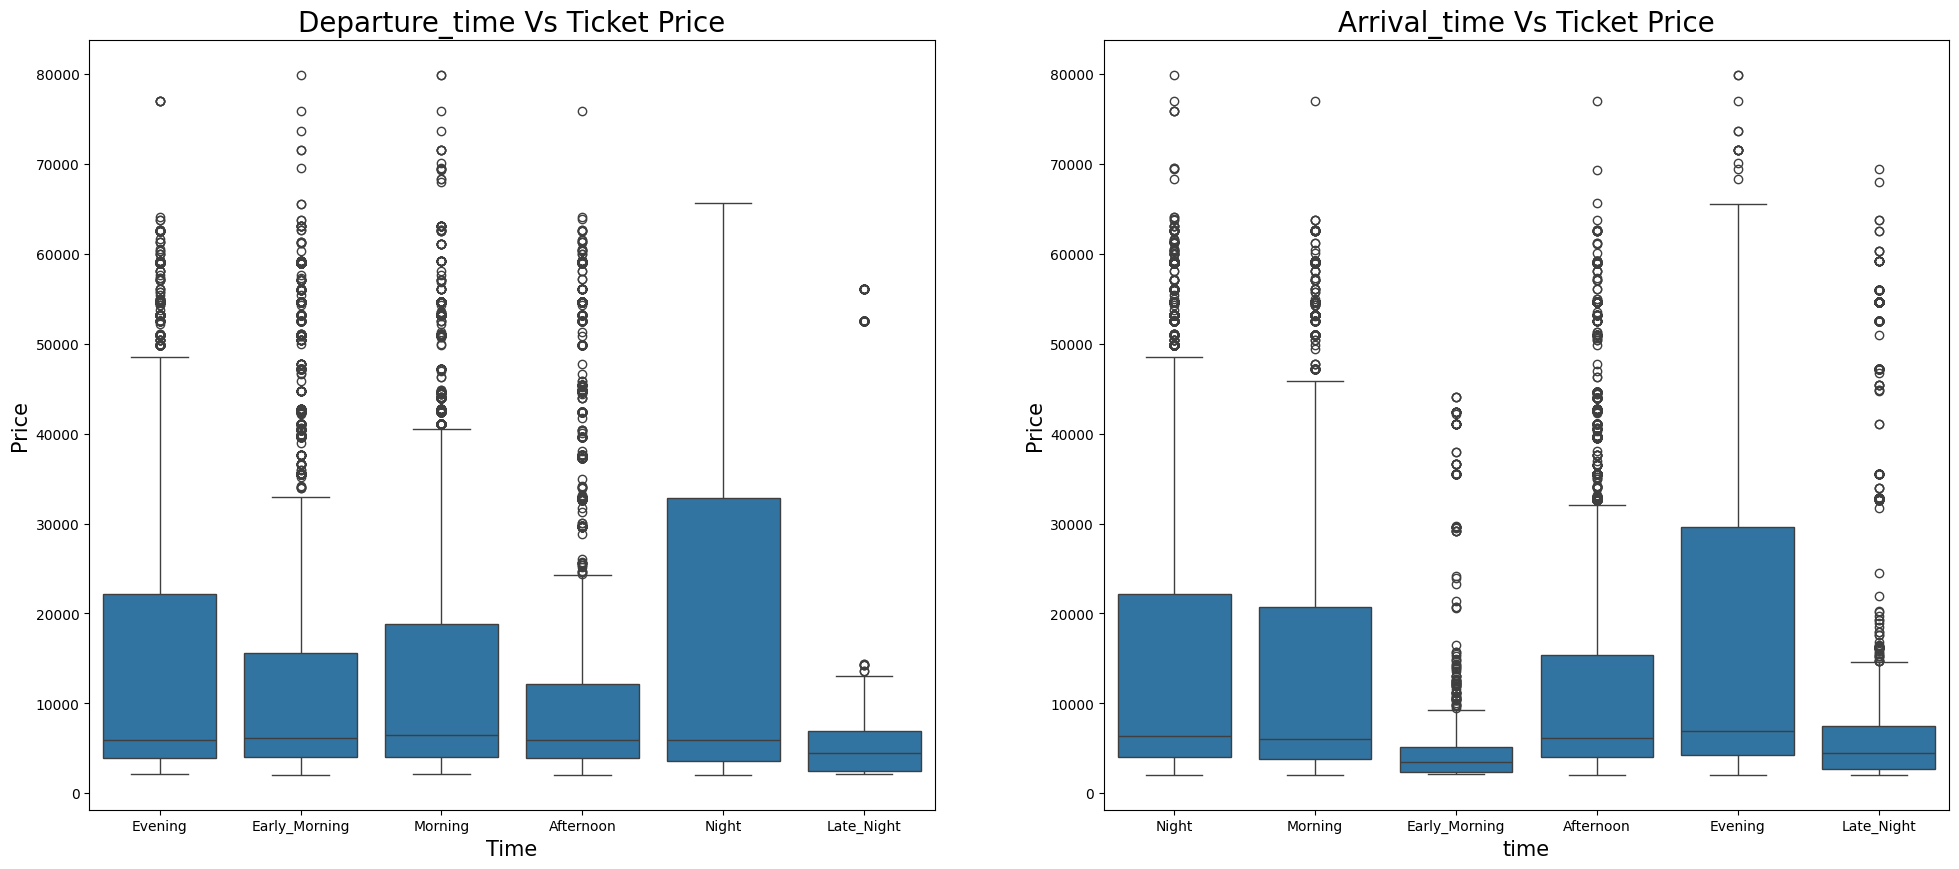

In [9]:
#Departure time vs the fare and arrival time vs fare
plt.figure(figsize=(24,10))
#defines the size of the figure 

#creates subplot 1rows and 2 columns left side
plt.subplot(1,2,1)
s.boxplot(x='departure_time',y='price',data=data)
plt.title('Departure_time Vs Ticket Price',fontsize=20)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Price',fontsize=15)

#right side
plt.subplot(1,2,2)
s.boxplot(x='arrival_time',y='price',data=data)
plt.title('Arrival_time Vs Ticket Price',fontsize=20)
plt.xlabel('time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

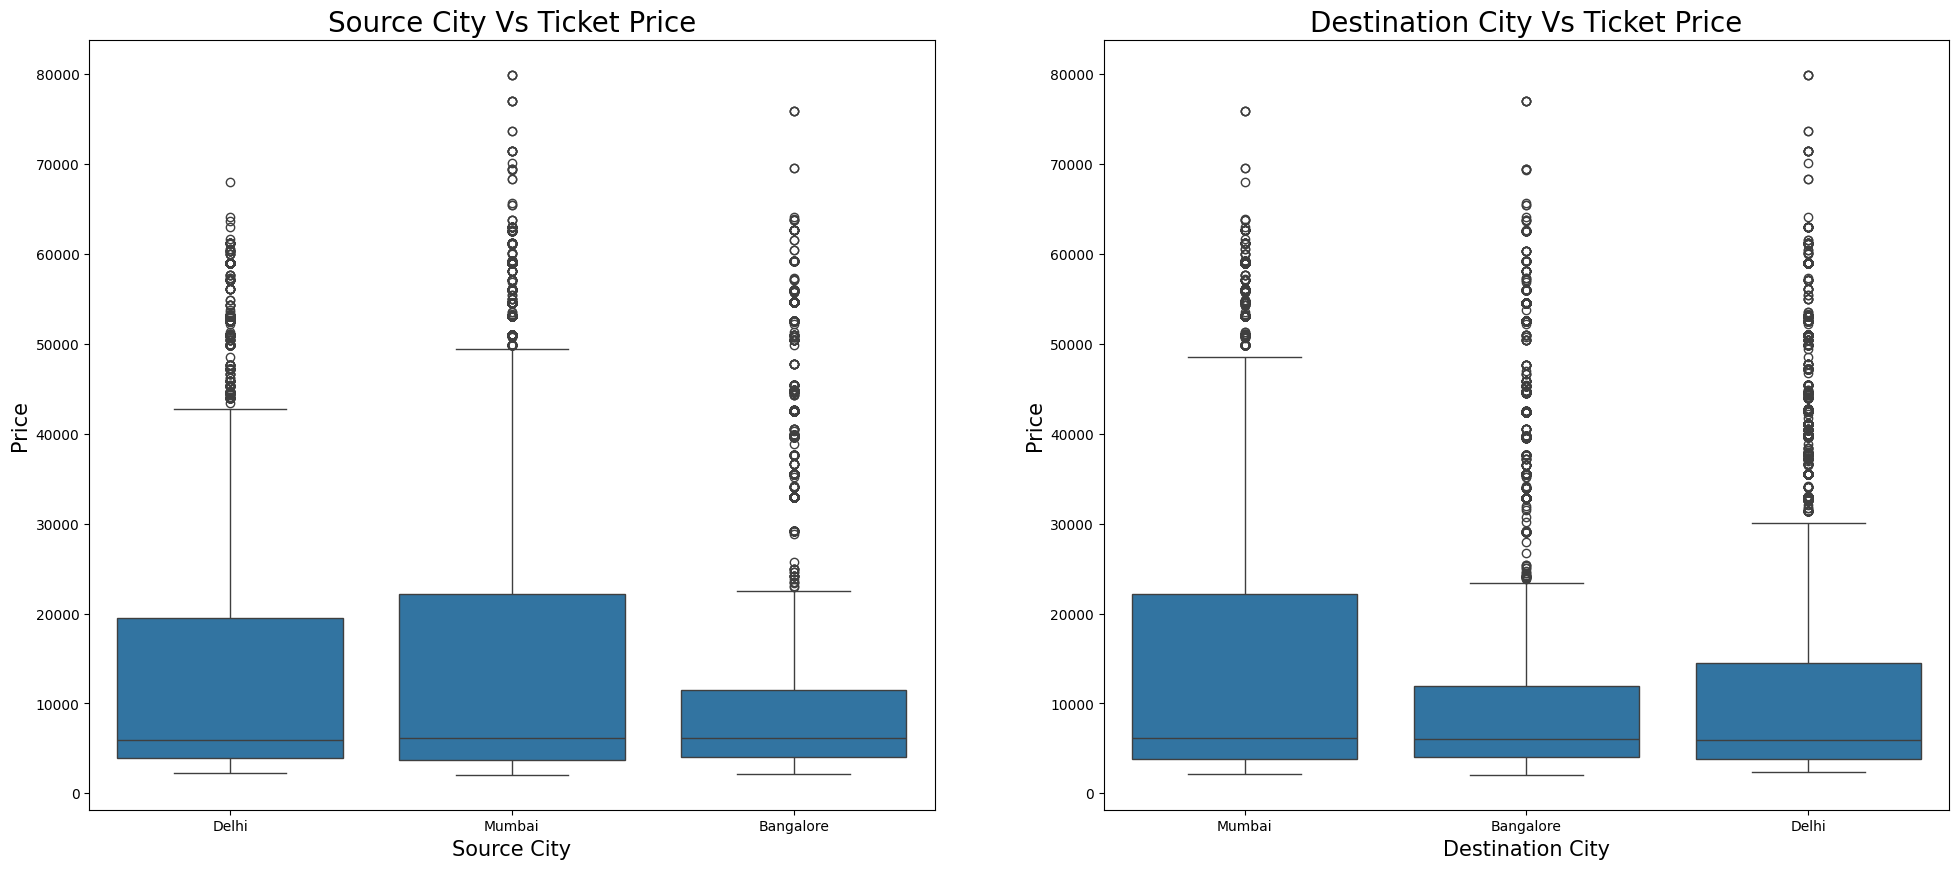

In [10]:
#Initisl city and destination city vs fare

plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
s.boxplot(x='source_city',y='price',data=data)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
s.boxplot(x='destination_city',y='price',data=data)
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Text(0, 0.5, 'Price')

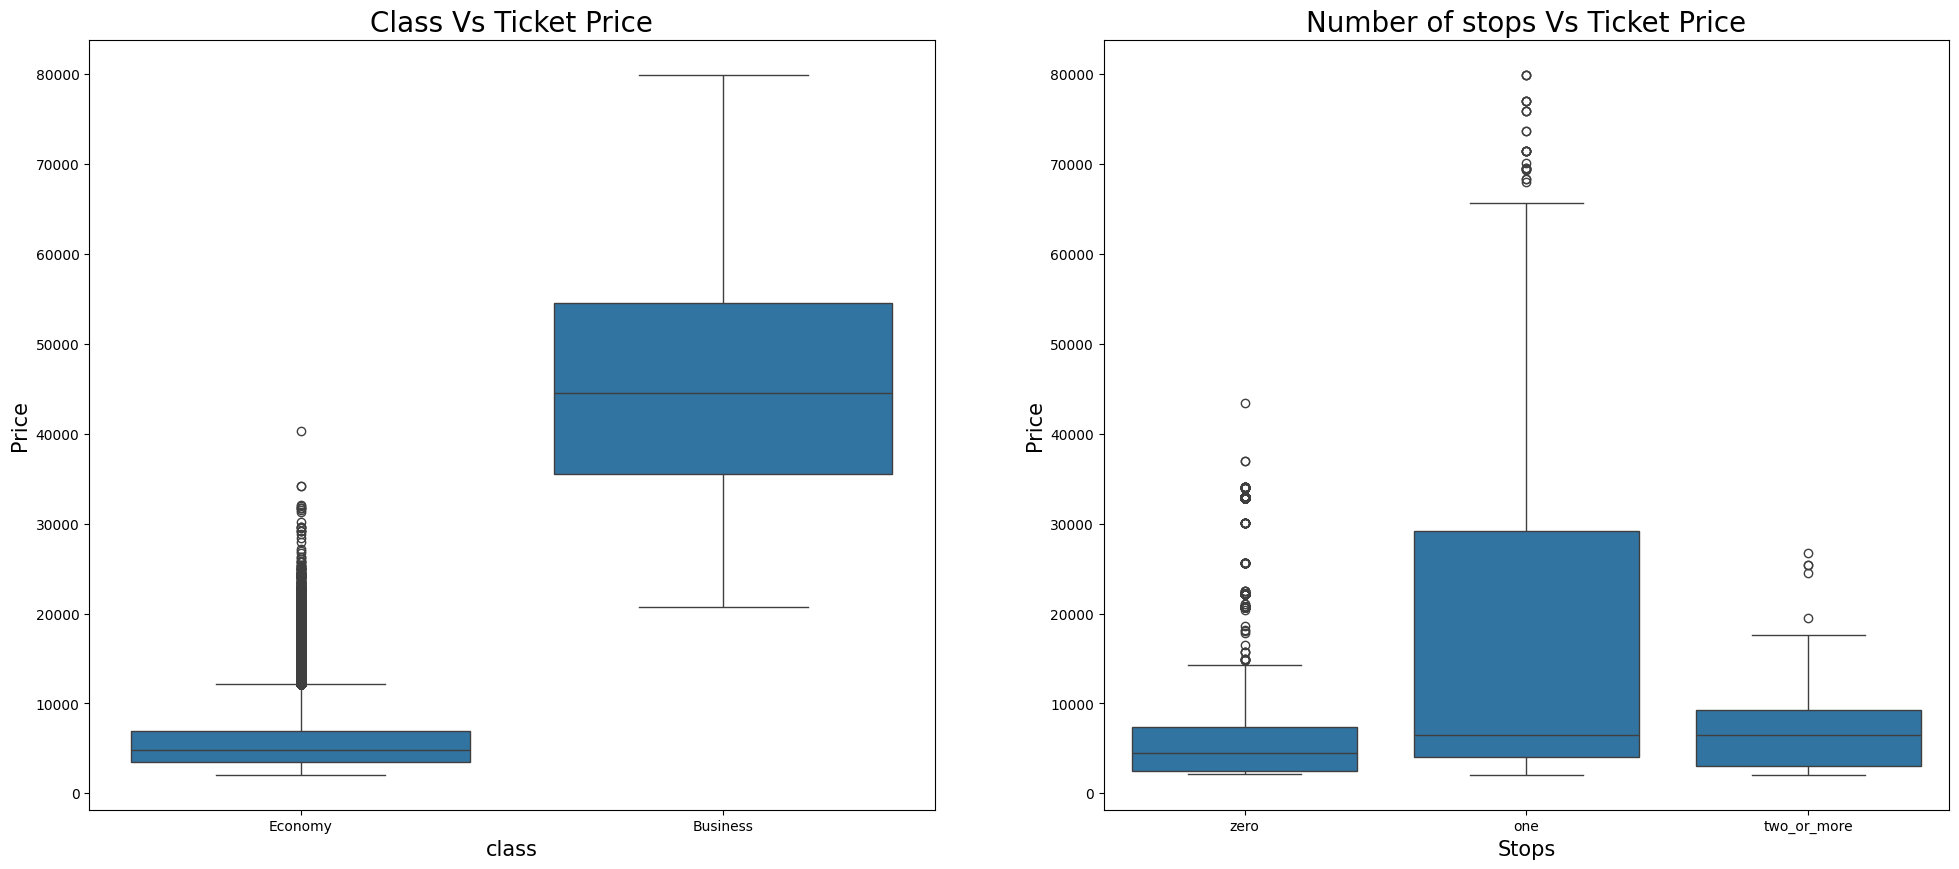

In [11]:
# flight class vs fare price 
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
s.boxplot(x='class',y='price',data=data)
plt.title('Class Vs Ticket Price',fontsize=20)
plt.xlabel('class',fontsize=15)
plt.ylabel('Price',fontsize=15)

#stops vs fare
plt.subplot(1,2,2)
s.boxplot(x='stops',y='price',data=data)
plt.title('Number of stops Vs Ticket Price',fontsize=20)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)


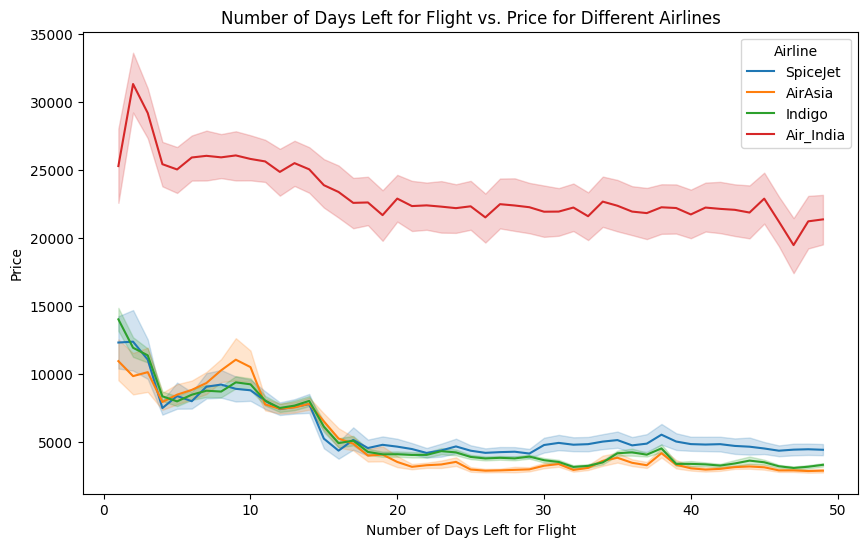

In [12]:
#Days left for flight vs fare 
plt.figure(figsize=(10, 6))
s.lineplot(data=data, x='days_left', y='price', hue='airline')

plt.title('Number of Days Left for Flight vs. Price for Different Airlines')
plt.xlabel('Number of Days Left for Flight')
plt.ylabel('Price')
plt.legend(title='Airline')

plt.show()

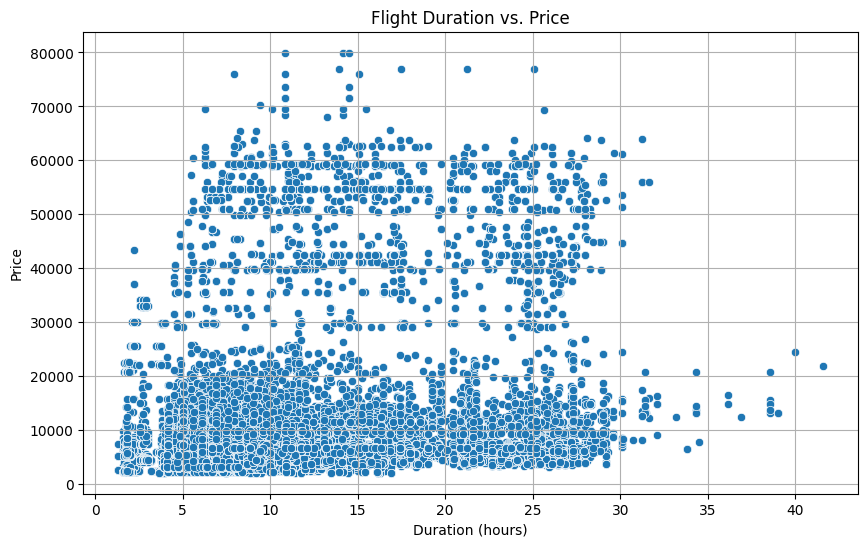

In [13]:
#flight duration vs fare 
plt.figure(figsize=(10, 6))
s.scatterplot(data=data, x='duration', y='price')

plt.title('Flight Duration vs. Price')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])

In [15]:
#seperating X and y for training the model
x=data.drop(['price'],axis=1)
y=data['price']
display(x)
display(y)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,3,587,1,2,2,5,2,1,2.17,1
1,3,572,1,1,2,4,2,1,2.33,1
2,0,490,1,1,2,1,2,1,2.17,1
3,2,110,1,1,2,4,2,1,2.17,1
4,2,197,1,4,2,0,2,1,2.17,1
...,...,...,...,...,...,...,...,...,...,...
41523,1,317,0,2,0,4,2,0,16.33,49
41524,1,317,0,2,0,0,2,0,19.00,49
41525,1,394,0,5,0,2,2,0,21.25,49
41526,1,317,0,2,0,2,2,0,24.42,49


0         5953
1         5953
2         5956
3         5955
4         5955
         ...  
41523    54684
41524    54684
41525    54684
41526    54684
41527    56058
Name: price, Length: 41528, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((33222, 10), (8306, 10), (33222,), (8306,))

Scaling is required in the dataset to improve the model's performance. In dataset there can be values between 0 to 1 and rest beyond 100 so there are chances that higher values may dominate the model or for faster convergence of the gradient descent (which I have not used here), so it is important.

Robust Scaler regressor is best if your data contains outliners it takes interquartile values means x(scaled)=x-Q1/Q2-Q3
here 
Q1=the value below which 25% of data lies
Q2=the value below which 50% of data lies
Q3=the value below which 75% of data lies
by doing this the data points after 75% are potential outliners and will have not more influence on the model

In [17]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

<h2>Linear regressor</h2>

<img src="https://www.researchgate.net/profile/Hieu-Tran-17/publication/340271573/figure/fig3/AS:874657431437319@1585545990533/Linear-Regression-model-sample-illustration.ppm" alt="Linear Regressor" width="400" height="300">

This model tries to fit the data by finding linear realtionship between the features of the data with the target value 
eg:y=mX+b
here y is the estimation we need
X is array of all the important features
m is also an array having suitable values corresponding to each feature
b is constan
m

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
#Linear regressor
linear_params = {}
lr = LinearRegression()
linear_grid_search = GridSearchCV(lr, param_grid=linear_params, cv=5, scoring='r2')
linear_grid_search.fit(x_train, y_train)

#best regressor
l_b_r = linear_grid_search.best_estimator_

y_pred_train= l_b_r.predict(x_train)
y_pred =l_b_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
    
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
print("Linear Regressor")
print("Best parameters:", linear_grid_search.best_params_)
print(f"Training data: R2 Score: {r2_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Testing data: R2 Score: {r2:.4f}, RMSE: {rmse:.4f}\n\n")


Linear Regressor
Best parameters: {}
Training data: R2 Score: 0.8978, RMSE: 5597.8283
Testing data: R2 Score: 0.8963, RMSE: 5614.2375




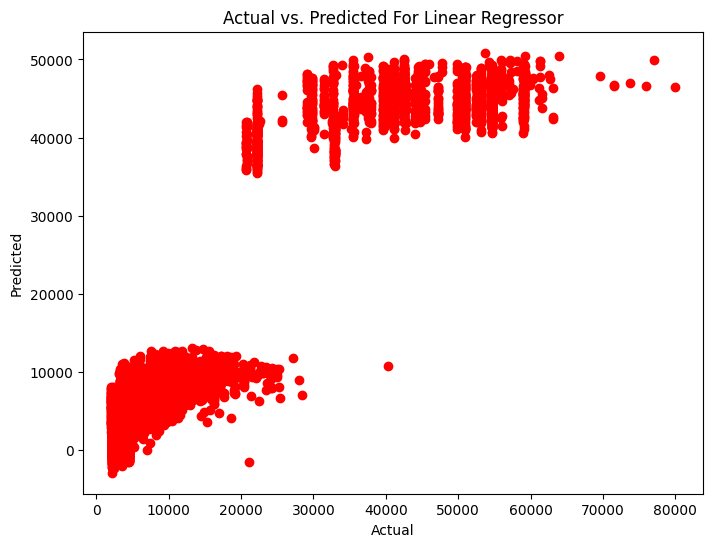

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted For Linear Regressor')
plt.show()

<h2>XGBOOST Regressor</h2>

<img src="https://www.mdpi.com/materials/materials-15-05298/article_deploy/html/images/materials-15-05298-g001.png" alt="XGB Regressor" width="400" height="300">


It is gradient boosted decision tree that has inbuilt regularisation techniques to reduce overfitting

<h3>DECISION TREE</h3>

<img src="https://i.ytimg.com/vi/UhY5vPfQIrA/maxresdefault.jpg" alt="Decision Tree Regressor" width="400" height="300">

Decision tree is a model that has  a hierarchical structure composed of nodes and branches,it splits the branches on some specific criteria.


In [21]:
import xgboost as xgb
#XGBOOST Regressor
xgb_params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
xgb = xgb.XGBRegressor()
xgb_grid_search = GridSearchCV(xgb, param_grid=xgb_params, cv=5, scoring='r2')
xgb_grid_search.fit(x_train, y_train)

xgb_best= xgb_grid_search.best_estimator_

y_pred_train= xgb_best.predict(x_train)
y_pred = xgb_best.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
    
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
print("XGBOOST Regressor")
print("Best parameters:", xgb_grid_search.best_params_)
print(f"Training data: R2 Score: {r2_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Testing data: R2 Score: {r2:.4f}, RMSE: {rmse:.4f}\n\n")


XGBOOST Regressor
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Training data: R2 Score: 0.9994, RMSE: 427.9782
Testing data: R2 Score: 0.9919, RMSE: 1570.5953




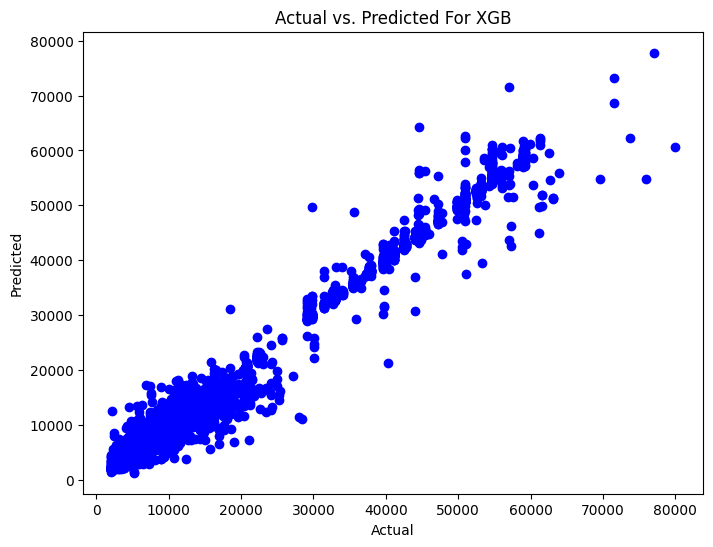

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted For XGB')
plt.show()

<h2>Random Forest Regressor</h2>

<img src="https://serokell.io/files/vz/vz1f8191.Ensemble-of-decision-trees.png" alt="Random Forest Regressor" width="400" height="300">

Random Forest is extended version of decision trees wherein the model uses more than one decision trees for fitting the data


In [23]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest Regressor
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf = RandomForestRegressor()
rf_grid_search = GridSearchCV(rf, param_grid=rf_params, cv=5, scoring='r2')
rf_grid_search.fit(x_train, y_train)

rf_best= rf_grid_search.best_estimator_

y_pred_train= rf_best.predict(x_train)
y_pred = rf_best.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
    
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
print("Random Forest Regressor")
print("Best parameters:", rf_grid_search.best_params_)
print(f"Training data: R2 Score: {r2_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Testing data: R2 Score: {r2:.4f}, RMSE: {rmse:.4f}\n\n")

Random Forest Regressor
Best parameters: {'max_depth': 20, 'n_estimators': 200}
Training data: R2 Score: 0.9988, RMSE: 611.7006
Testing data: R2 Score: 0.9917, RMSE: 1587.5685




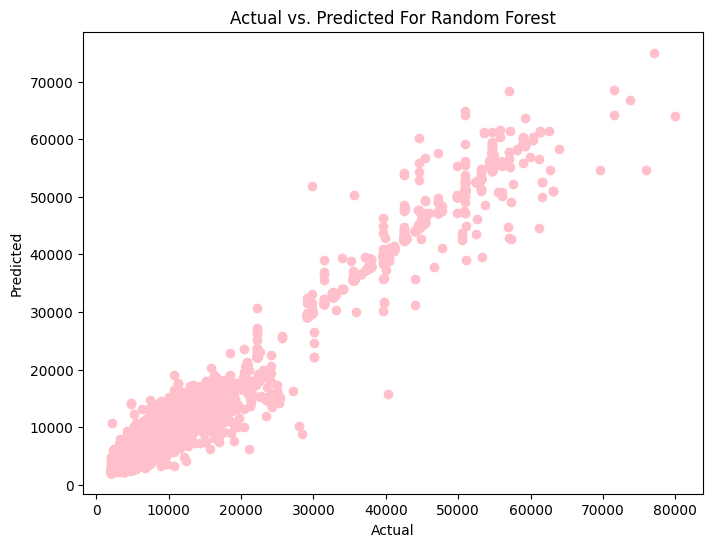

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='pink')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted For Random Forest')
plt.show()


<h2>ANALYSIS OF THE MODEL</h2>

INCREASING ACCURACY OF THE MODEL

i) By using more parameters in the models and optimizing the parameters the accuracy can be increased further. For this regularisation of those parameters can be done to optimise the value of those hyperparameters.

ii) The model's accuracy can be increased by using neural networks by training the neural networks to have appropriate layers and neurons.
(I would have used neural networks but I don't know how to decide the number of layers and neurons to be kept).


<h2>Underfitting and overfitting</h2>

Underfitting:
This means that the model would not fit properly on the training data set. We should change the model or we need to increase the training data or by increasing the number of features.

Overfitting:
It means that the model has done more fitting to the training data. This would give a poor prediction of test data.
Can be sorted out by using cross-validation sets and by tuning the hyperparameters, or by increasing the training data or reducing the features.

(Cross_validation data set is also the part of the training data set that is used to check the accuracy of the model.)
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png" alt="XGB Regressor" width="400" height="300">
